## Краткое описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работы
1. Подготовить данные
2. Провести исследовательский анализ данных
3. Составить портрет пользователя каждого региона
4. Проверить гипотезы

## Подготовка данных

### Импортируем библиотеки и открываем файл с данными

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Выводим необходимую информацию по датафрейму

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Строим общую гистограмму числовых столбцов

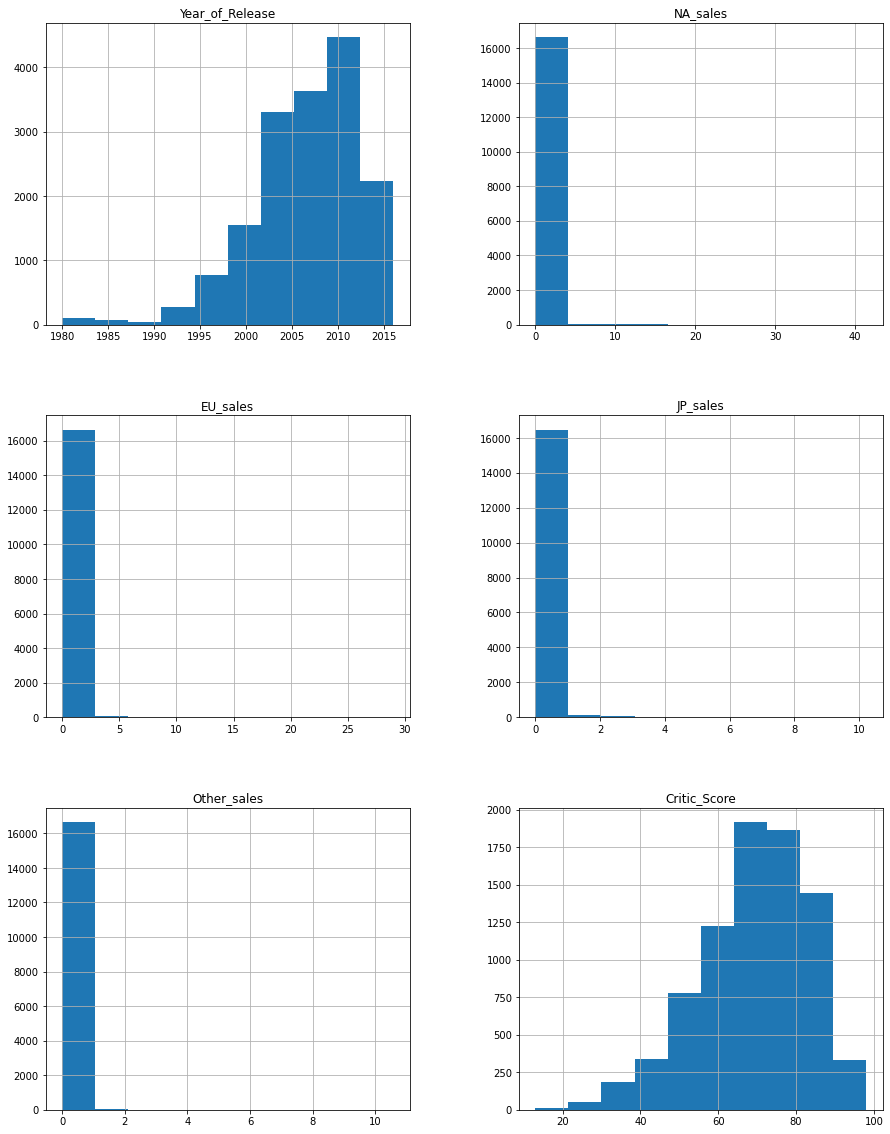

In [4]:
data.hist(figsize=(15, 20));

Из общей гистограммы можно отметить, что:
1. Все столбцы, содержащие информацию по продажам, требуют более внимательного изучения, т.к. подобные гистограммы оказались не особо информативными.
2. Гистограммы столбцов `year_of_release`, `critic_score` и `user_score` представляют собой нормальное распределение и выбросов практически не наблюдается.

### Приводим названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы <a id='tbd'></a>
Меняем `platform`(в данном столбце присутствуют категории - платформы) ,`rating` (аналогично, узкий набор рейтингов, выраженный в буквах) и `user_score`(`critic_score` в формате float, приводим в соответствие).

In [6]:
data[['platform']] = data[['platform']].astype('category')
data[['rating']] = data[['rating']].astype('category')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(2), float64(7), object(2)
memory usage: 1.2+ MB


### Обработка пропусков
Сначала оценим количество пропусков и в каких столбцах они есть.

In [7]:
data.isnull().sum()/len(data)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Сразу бросается в глаза две вещи:
1. В столбцах `critic_score` и `user_score` отсутствует половина значений (а в `rating` почти треть). Из-за такого объема данных, заполнять их чем-то или удалять эти значения - слишком большое влияние на данные, что может в свою очередь негативно сказаться на всём исследовании. Тут нужно выяснять причины их отсутствия.
2. Столбцы `name` и `genre` имеет лишь 2 пропуска, нужо посмотреть подробнее на строки с пропусками в данных значениях, много ли пропусков в других столбцах. Если да - то свободно отбрасываем, тк. количество ничтожно мало для значительного влияния на выборку. 
3. `year_of_release` имеет 269 пропусков. Но так как датафрейм не отсортирован по датам, заполнять его не стоит не по предыдущим значениям, не тем более медианным или средним.

Причинами пропусков в `critic_score` и `user_score`, помимо типичных ошибок при сборе данных и т.д., могут быть игры, не дошедшие до релиза, соответственно, не получившие оценки, в пользу чего играет то, что пропусков в оценках критиков меньше, чем в оценках пользователей, т.к. критикам часто дают предрелизные версии. Та же ситуация вполне возможна и с `rating`. Так же это могут быть игры, распространяемые не на широкую публику или просто не особо популярные игры.
Что касается `year_of_release`, опять же, невышедшие игры (без даты релиза), либо заявленная дата не совпала с фактической, что вызвало пропуски в данных.

Проверими пропуски в `name` и `genre`.

In [8]:
print(data[data['name'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Как и ожидалось, это одни и те же строчки. 659 удалять не будем, т.к. почти 2 миллиона копий проданных в Северной Америке, полмиллиона в Европе + наличие года выпуска являются важными данными для исследования. 
14244 же можно просто удалить, хотя продажи в размере 30 тясяч в Японии настораживают.

In [9]:
data.dropna(subset=['name'], inplace=True)
print(data[data['name'].isnull()])

#меняем пропуски в rating на Unknown по совету ревьювера
print()
data[['rating']] = data[['rating']].astype('object')
data['rating'] = data['rating'].fillna('Unknown')
data[['rating']] = data[['rating']].astype('category')
print(data['rating'].unique())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (9, object): ['E', 'Unknown', 'M', 'T', ..., 'K-A', 'AO', 'EC', 'RP']


TBD - еще не определено / предстоит определить. Для нашего исследования носит такой же характер, как и пустые значения, так что их можно без угрызений совести либо оставить как есть для выделения в собственную категорию, либо заполнить пустыми значениями для объединения с отсутствующими оценками, либо же заполнить в соответствии с оценками критиков, но это экстремальное решение, так как может серьезно повлиять на результат исследования. Мы же приравняли их к пустым значениям [вот тут](#tbd).

### Обработка дубликатов

In [10]:
# проверка на неявные дубликаты. Проверим уникальные значения столбцов, где они в теории могут быть
column_list = ['platform', 'genre']
for i in column_list:
    display(data[i].value_counts())
    print()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

В `genre` дубликатов не наблюдается, однако с `platform` не все так однозначно. Мы не знаем достоверно что может явиться дубликатом чего. К примеру, даже если взять нижние 9 строчек `data['genre'].value_counts()`, то не ясно, консоль с таким названием была непопулярна/старой, или же это дубликат названий других консолей(`3DS` и `3DO`, `GG` и `GC` и т.д.) В любом случае, среди более часто встречающихся значений дубликатов точно не наблюдается. 

### Суммарные продажи

In [11]:
# проект выполнялся ДО получения знаний о существовании такой магии, как .sum(axis=1)
data['total_sales'] = data['other_sales']\
+ data['na_sales']\
+ data['eu_sales']\
+ data['jp_sales']
display(data['total_sales'].head())

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

## Проведите исследовательский анализ данных

### Сколько игр выпускалось в разные годы

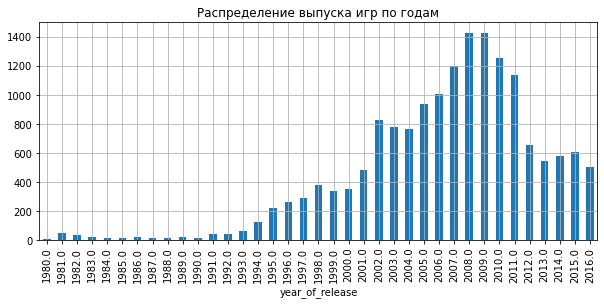

In [12]:
# используем сводную таблицу и после составим столбчатую диаграмму
titles_by_year = data.pivot_table(index='year_of_release',
    values='name',
    aggfunc='count')
titles_by_year.plot(kind='bar', 
    figsize=(10,4), 
    grid=True,
    title='Распределение выпуска игр по годам').get_legend().remove()

Из графика видно, что продажи постоянно притерпевали изменения, и, например, такого пика как в 2007 году точно не будет. Исходя из чего можно предположить, что стоить брать данные лишь за последние 3 года.

### Как менялись продажи по платформам

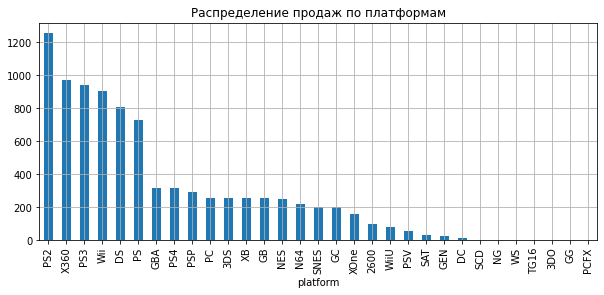

In [13]:
sales_by_platform = data.pivot_table(index='platform',
    values='total_sales',
    aggfunc='sum')
sales_by_platform = sales_by_platform.sort_values(by =['total_sales'],
    ascending=False)
sales_by_platform.plot(kind='bar',
    figsize=(10,4), 
    grid=True,
    title='Распределение продаж по платформам').get_legend().remove()

Возьмем 10 самых популярных платформ. Построим графики распределения по годам.


Суммарные продажи по годам на платформе PS2


,year_of_release,total_sales
0,2000.0,39.17
1,2001.0,166.43
2,2002.0,205.38
3,2003.0,184.31
4,2004.0,211.81
5,2005.0,160.66
6,2006.0,103.42
7,2007.0,75.99
8,2008.0,53.90
9,2009.0,26.40



Суммарные продажи по годам на платформе X360


,year_of_release,total_sales
0,2005.0,8.25
1,2006.0,51.62
2,2007.0,95.41
3,2008.0,135.26
4,2009.0,120.29
5,2010.0,170.03
6,2011.0,143.84
7,2012.0,99.74
8,2013.0,88.58
9,2014.0,34.74



Суммарные продажи по годам на платформе PS3


,year_of_release,total_sales
0,2006.0,20.96
1,2007.0,73.19
2,2008.0,118.52
3,2009.0,130.93
4,2010.0,142.17
5,2011.0,156.78
6,2012.0,107.36
7,2013.0,113.25
8,2014.0,47.76
9,2015.0,16.82



Суммарные продажи по годам на платформе Wii


,year_of_release,total_sales
0,2006.0,137.15
1,2007.0,152.77
2,2008.0,171.32
3,2009.0,206.97
4,2010.0,127.95
5,2011.0,59.65
6,2012.0,21.71
7,2013.0,8.59
8,2014.0,3.75
9,2015.0,1.14



Суммарные продажи по годам на платформе DS


,year_of_release,total_sales
0,1985.0,0.02
1,2004.0,17.27
2,2005.0,130.14
3,2006.0,119.81
4,2007.0,146.94
5,2008.0,145.31
6,2009.0,119.54
7,2010.0,85.02
8,2011.0,26.18
9,2012.0,11.01



Суммарные продажи по годам на платформе PS


,year_of_release,total_sales
0,1994.0,6.03
1,1995.0,35.96
2,1996.0,94.70
3,1997.0,136.17
4,1998.0,169.49
5,1999.0,144.53
6,2000.0,96.37
7,2001.0,35.59
8,2002.0,6.67
9,2003.0,2.07



Суммарные продажи по годам на платформе GBA


,year_of_release,total_sales
0,2000.0,0.07
1,2001.0,61.53
2,2002.0,74.16
3,2003.0,56.67
4,2004.0,77.91
5,2005.0,33.86
6,2006.0,5.28
7,2007.0,3.40



Суммарные продажи по годам на платформе PS4


,year_of_release,total_sales
0,2013.0,25.99
1,2014.0,100.00
2,2015.0,118.90
3,2016.0,69.25



Суммарные продажи по годам на платформе PSP


,year_of_release,total_sales
0,2004.0,7.06
1,2005.0,43.84
2,2006.0,55.32
3,2007.0,46.93
4,2008.0,34.55
5,2009.0,37.78
6,2010.0,35.04
7,2011.0,17.82
8,2012.0,7.69
9,2013.0,3.14



Суммарные продажи по годам на платформе PC


,year_of_release,total_sales
0,1985.0,0.04
1,1988.0,0.03
2,1992.0,3.03
3,1994.0,12.87
4,1995.0,4.22
5,1996.0,10.58
6,1997.0,11.27
7,1998.0,3.26
8,1999.0,4.74
9,2000.0,4.66


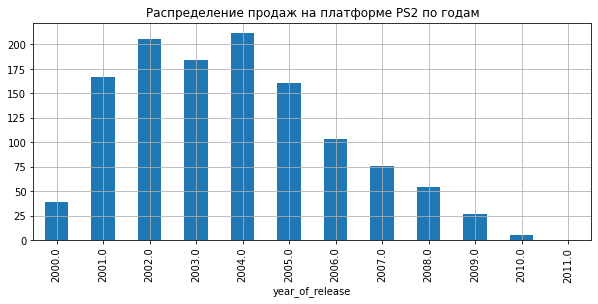

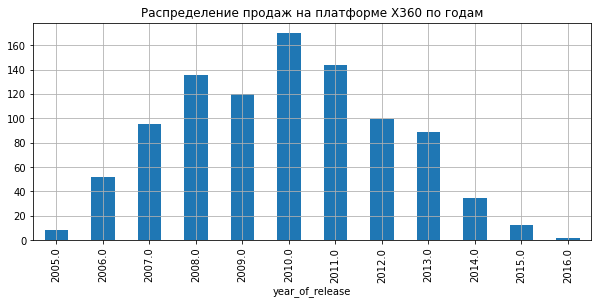

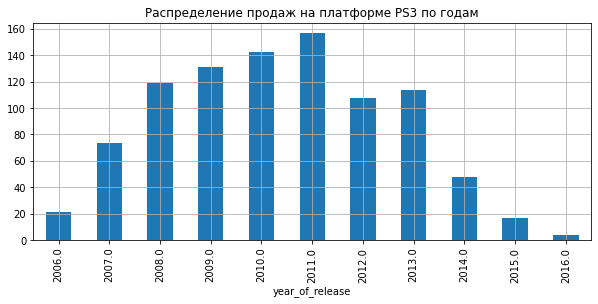

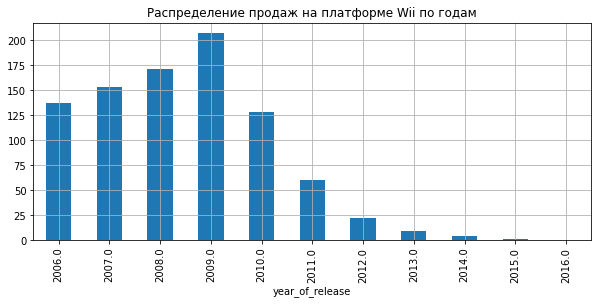

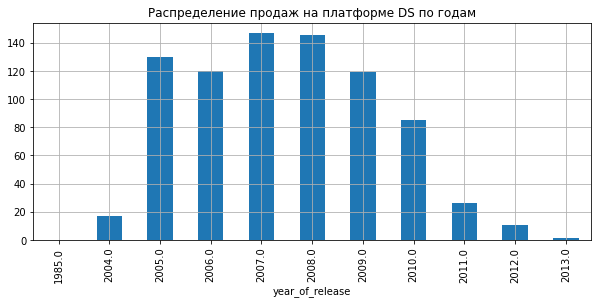

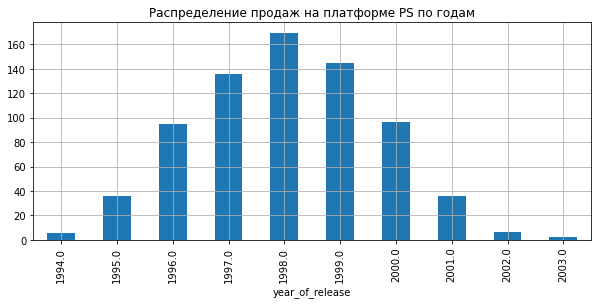

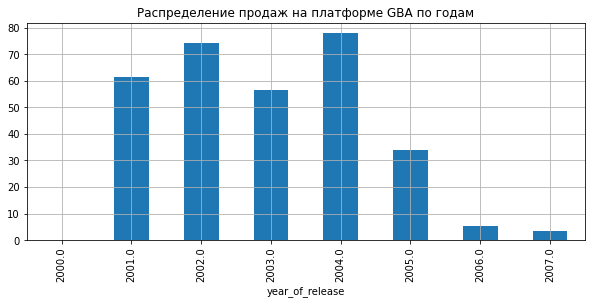

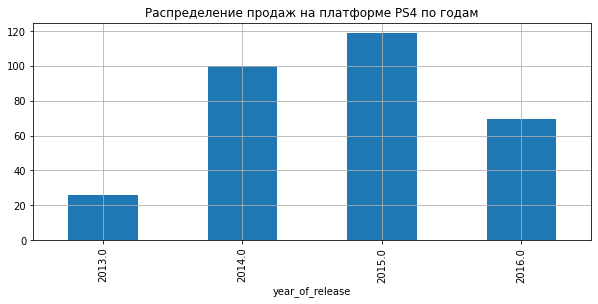

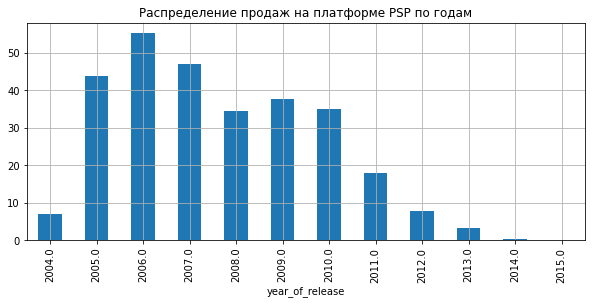

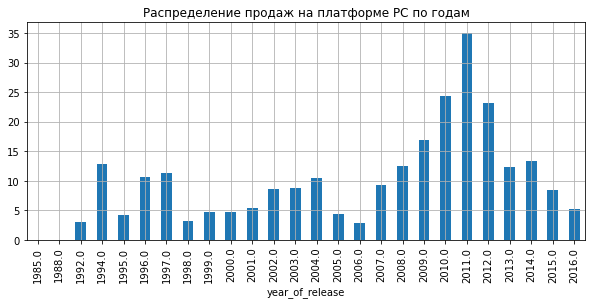

In [14]:
platforms_list = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]
for i in platforms_list:
    print()
    print("Суммарные продажи по годам на платформе", i)
    platform_sales = data.query('platform == @i')
    platform_sales_pivot = platform_sales.pivot_table(
        index="year_of_release",
        values = "total_sales",
        aggfunc = "sum").sort_values("year_of_release", ascending = True)
    platform_sales_pivot.reset_index(inplace=True)
    display(platform_sales_pivot)
    platform_sales_pivot.plot(
    kind = 'bar',
    x='year_of_release',
    y='total_sales',
    figsize=(10, 4),
    grid=True,
    title = "Распределение продаж на платформе " + i + " по годам").get_legend().remove()

Исходя из графиков, в среднем, цикл жизни платформы равен в среднем 6 годам. Соответственно для оценки платформ будет достаточно половины его ЖЦ, т.е. 3 года. Так как мы делаем прогноз на 2017 год, то *актуальным периодом* для нас будет 2014-2016 годы.

Повторим график продаж по платформам, но уже только за последние 3 года.

<AxesSubplot:title={'center':'Распределение продаж по платформам за 2014-2016'}, xlabel='platform'>

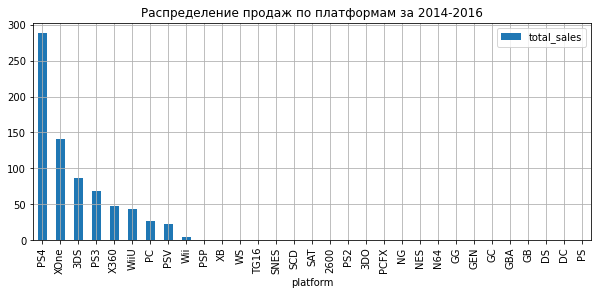

In [15]:
sales_2014_2016 = data.query('year_of_release >= 2014')
sales_2014_2016_pivot = sales_2014_2016.pivot_table(index='platform',
    values='total_sales',
    aggfunc='sum')\
    .sort_values(by =['total_sales'],
    ascending=False)
sales_2014_2016_pivot.plot(kind='bar',
    figsize=(10,4), 
    grid=True,
    title='Распределение продаж по платформам за 2014-2016')

По продажам лидируют `PS4`, следом `XOne` и `3DS`.

Посмотрим распределение новых топ 8 платформ по последним 3 годам.


Суммарные продажи 2014-2016 на платформе PS4


,year_of_release,total_sales
0,2014.0,100.00
1,2015.0,118.90
2,2016.0,69.25



Суммарные продажи 2014-2016 на платформе XOne


,year_of_release,total_sales
0,2014.0,54.07
1,2015.0,60.14
2,2016.0,26.15



Суммарные продажи 2014-2016 на платформе 3DS


,year_of_release,total_sales
0,2014.0,43.76
1,2015.0,27.78
2,2016.0,15.14



Суммарные продажи 2014-2016 на платформе PS3


,year_of_release,total_sales
0,2014.0,47.76
1,2015.0,16.82
2,2016.0,3.60



Суммарные продажи 2014-2016 на платформе X360


,year_of_release,total_sales
0,2014.0,34.74
1,2015.0,11.96
2,2016.0,1.52



Суммарные продажи 2014-2016 на платформе WiiU


,year_of_release,total_sales
0,2014.0,22.03
1,2015.0,16.35
2,2016.0,4.60



Суммарные продажи 2014-2016 на платформе PC


,year_of_release,total_sales
0,2014.0,13.28
1,2015.0,8.52
2,2016.0,5.25



Суммарные продажи 2014-2016 на платформе PSV


,year_of_release,total_sales
0,2014.0,11.90
1,2015.0,6.25
2,2016.0,4.25


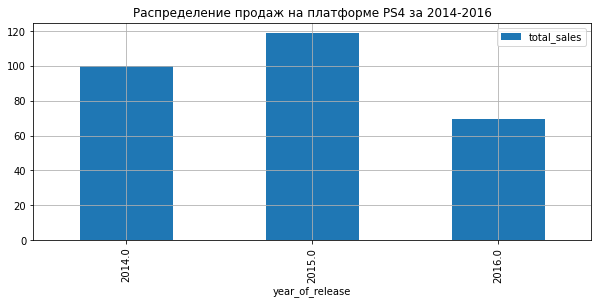

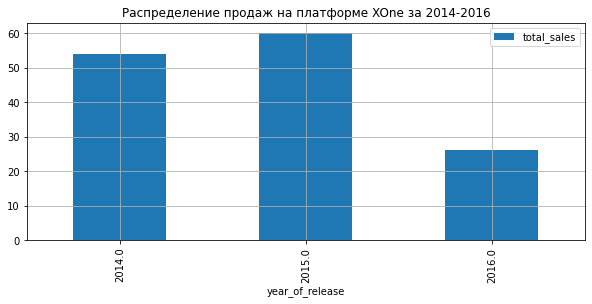

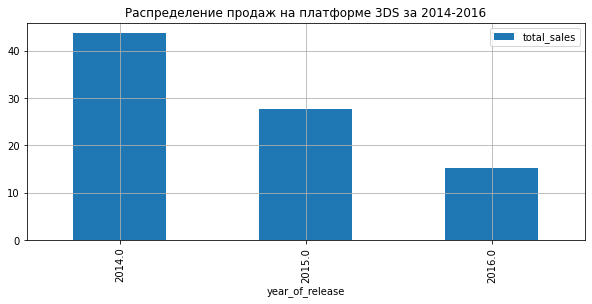

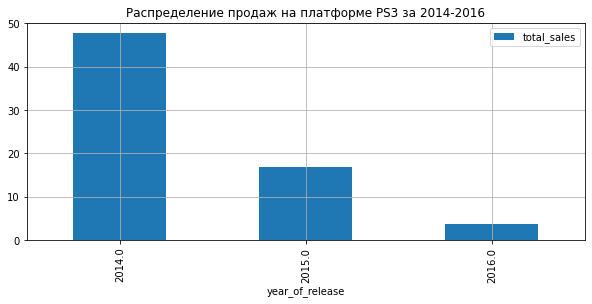

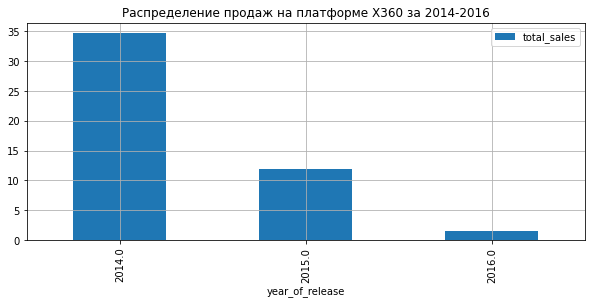

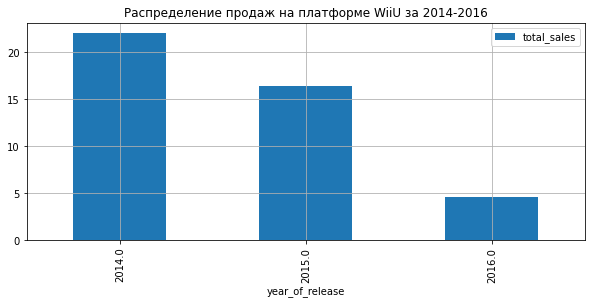

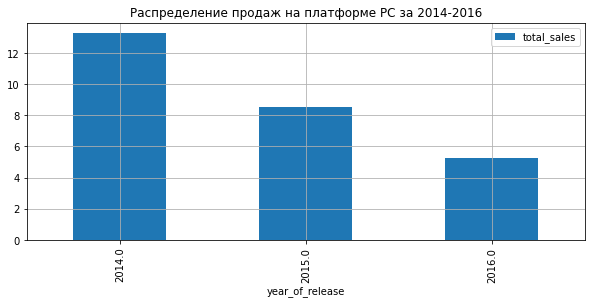

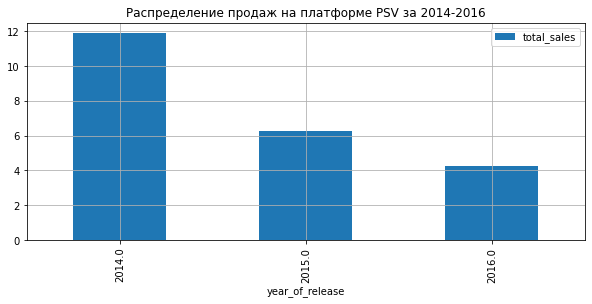

In [16]:
platforms_list_new = ["PS4", "XOne", "3DS", "PS3", "X360", "WiiU", "PC", "PSV"]
for i in platforms_list_new:
    print()
    print("Суммарные продажи 2014-2016 на платформе", i)
    platform_sales_new = data.query('platform == @i and year_of_release >= 2014')
    platform_sales_pivot_new = platform_sales_new.pivot_table(
        index="year_of_release",
        values = "total_sales",
        aggfunc = "sum").sort_values("year_of_release", ascending = True)
    platform_sales_pivot_new.reset_index(inplace=True)
    display(platform_sales_pivot_new)
    platform_sales_pivot_new.plot(
    kind = 'bar',
    x='year_of_release',
    y='total_sales',
    figsize=(10, 4),
    grid=True,
    title = "Распределение продаж на платформе " + i + " за 2014-2016")

Так как данные за 2016 год не полные, то можно сделать вывод, что на стадии роста находятся лишь `PS4` и `XOne`. Они и являются наиболее потенциально прибыльными платформами. 

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам.

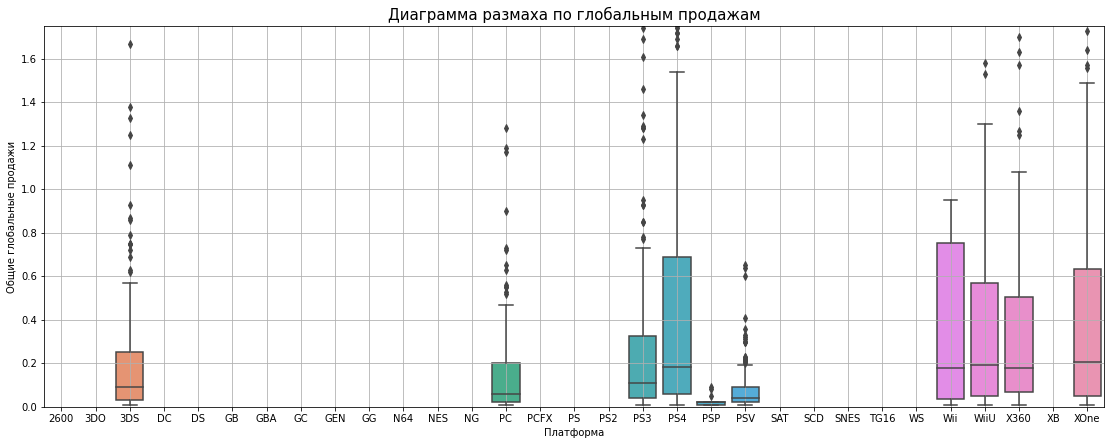

In [17]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=sales_2014_2016.sort_values(by='total_sales', ascending=False), x='platform', y='total_sales')
plt.title('Диаграмма размаха по глобальным продажам', fontsize=15)
plt.grid(which='major')
plt.xlabel('Платформа')
plt.ylabel('Общие глобальные продажи')
plt.ylim(0,1.75)
plt.show()

На данном графике можно выделить несколько закономерностей:
1. Перспективные платформы (`PS4`, `XOne`)имеют практически идентичные графики, что подтверждает равенство их конкуренции на рынке до 2016 года.
2. Платформы `Wii` и `WiiU` хоть и похожи медианой и квартилями на перспективные платформы, их верхние крайние значения значительно ниже, что говорит о значительно меньших продажах, сравнивая с более молодыми конкурентами. 

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Возьмём для данной задачи платформу `PS4`

Корреляция продаж от отзывов пользователей  -0.04013158947269732
Корреляция продаж от отзывов критиков  0.4026614106810409


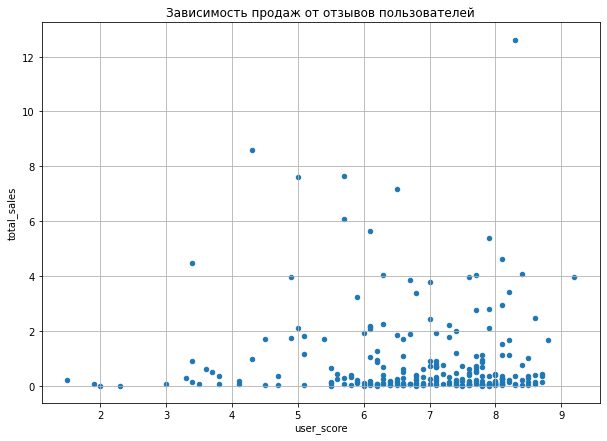

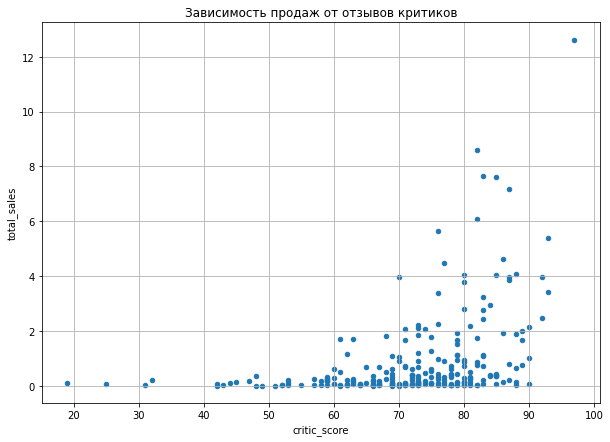

In [18]:
sales_2014_2016_PS4 = sales_2014_2016.query('platform == "PS4"')
sales_2014_2016_PS4.plot(kind='scatter', 
          x='user_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов пользователей')
print('Корреляция продаж от отзывов пользователей ', sales_2014_2016_PS4['user_score']\
      .corr(sales_2014_2016_PS4['total_sales']))

sales_2014_2016_PS4.plot(kind='scatter', 
          x='critic_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов критиков')
print('Корреляция продаж от отзывов критиков ',sales_2014_2016_PS4['critic_score']\
      .corr(sales_2014_2016_PS4['total_sales']))

Из полученных данных можно сделать вывод, что отзывы пользователей на платформе `PS4` за 2014-2016 годы практически никак не влияли на продажи игр(r=-0.04). Что касается отзывов критиков, то тут связь оказалась сильнее, но все равно слабой, и если все же брать ее во внимание, то хорошие отзывы критиков увеличивали продажи(r=0.4)

### Соотнесите выводы с продажами игр на других платформах

Продажи на платформе `PS4` в период с 2014 по 2016 годы превысили ближайшего конкурента вдвое. Так как корреляция с оценками критиков является слабой, то секрет успеха кроется явно не в высоких оценках игр на эту платформу.

Проведём подобный анализ с другими популярными платформами (`XOne` и `3DS`) за актуальный период.

Корреляция продаж от отзывов пользователей  -0.07038392806475806
Корреляция продаж от отзывов критиков  0.42867694370333226


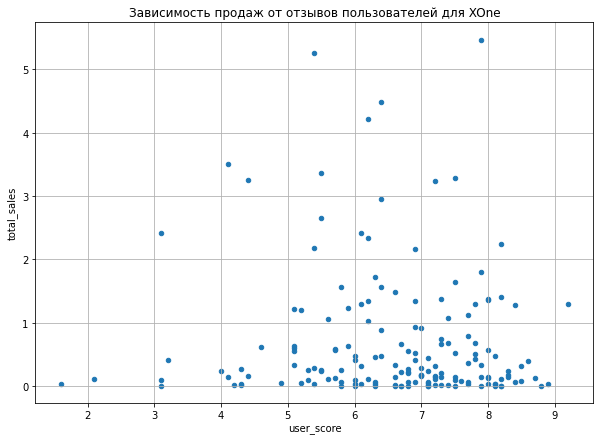

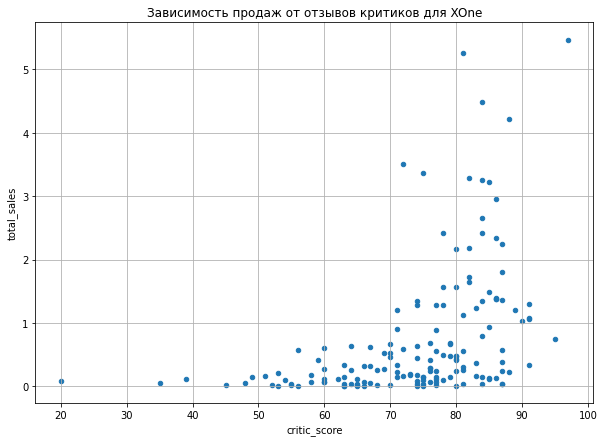

In [19]:
sales_2014_2016_XOne = sales_2014_2016.query('platform == "XOne"')
sales_2014_2016_XOne.plot(kind='scatter', 
          x='user_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов пользователей для XOne')
print('Корреляция продаж от отзывов пользователей ', sales_2014_2016_XOne['user_score']\
      .corr(sales_2014_2016_XOne['total_sales']))

sales_2014_2016_XOne.plot(kind='scatter', 
          x='critic_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов критиков для XOne')
print('Корреляция продаж от отзывов критиков ',sales_2014_2016_XOne['critic_score']\
      .corr(sales_2014_2016_XOne['total_sales']))

Корреляция продаж от отзывов пользователей  0.2151932718527027
Корреляция продаж от отзывов критиков  0.314117492869051


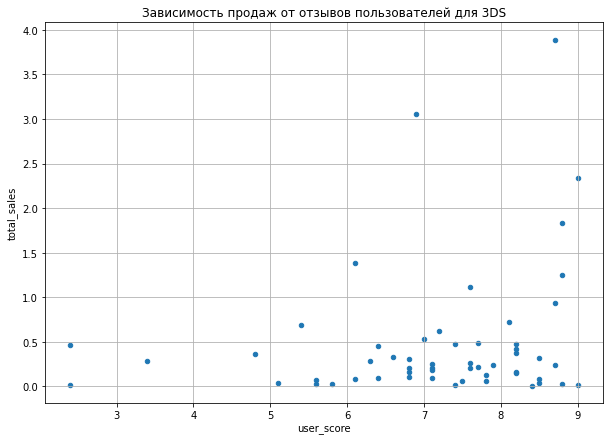

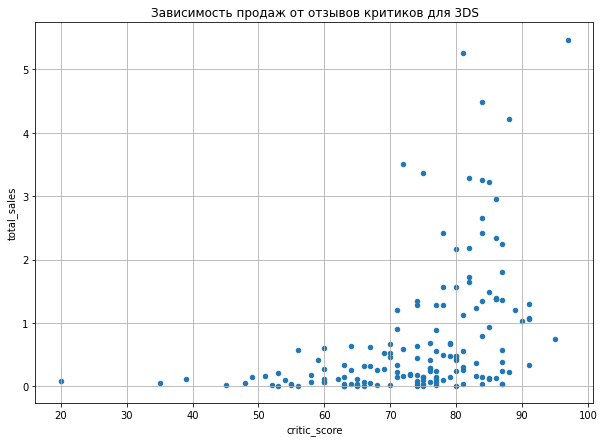

In [20]:
sales_2014_2016_3DS = sales_2014_2016.query('platform == "3DS"')
sales_2014_2016_3DS.plot(kind='scatter', 
          x='user_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов пользователей для 3DS')
print('Корреляция продаж от отзывов пользователей ', sales_2014_2016_3DS['user_score']\
      .corr(sales_2014_2016_3DS['total_sales']))

sales_2014_2016_XOne.plot(kind='scatter', 
          x='critic_score', 
          y='total_sales', 
          grid=True,
          figsize=(10,7),
          title='Зависимость продаж от отзывов критиков для 3DS')
print('Корреляция продаж от отзывов критиков ',sales_2014_2016_3DS['critic_score']\
      .corr(sales_2014_2016_3DS['total_sales']))

Из полученных коэффициентов корреляции и точечных графиков можно сделать вывод, что подобные слабые связи скорее всего характерны для всех платформ, т.к. для 3 самых популярных они не сильно отличаются.

### Общее распределение игр по жанрам

<AxesSubplot:title={'center':'Продажи по жанрам'}, xlabel='genre'>

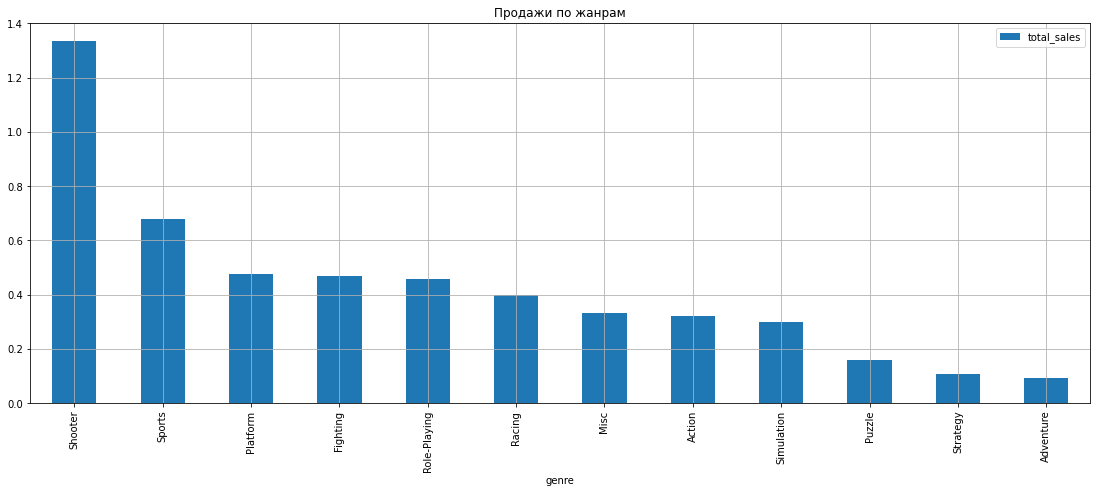

In [21]:
genre_sales_2014_2016 = sales_2014_2016.pivot_table(index='genre', values='total_sales')\
    .sort_values('total_sales', 
                 ascending=False)
genre_sales_2014_2016.plot(kind='bar', 
                           figsize=(19,7), 
                           grid=True, 
                           title='Продажи по жанрам')

По средним продажам явно преобладает жанр `Shooter`. Посмотрим на распределение игр в каждом жанре. Если шутеров больше всего, то такой результат не удивителен.

In [22]:
sales_2014_2016['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Выводы:
1. Шутеры находятся аж на пятом месте по количеству тайтлов, выпущенных в этом жанре. Значит это "горячий жанр", который крайне хорошо продаётся. 
2. Стоит отметить, что жанр `Adventure`, будучи на третьем месте по количеству игр, занимает последнее место по продажам, что в свою очередь говорит о маловероятном успехе, если выпускать игру в этом жанре.
3. Жанр `Platform` является третьим по количеству продаж, и при этом третьим с конца по количеству игр в нем. Значит ниша не заполнена большим количеством тайтлов, однако жанр очень хорошо продается. Точно стоит обратить внимание на это.

## Портрет пользователя каждого региона

### Самые популярные платформы

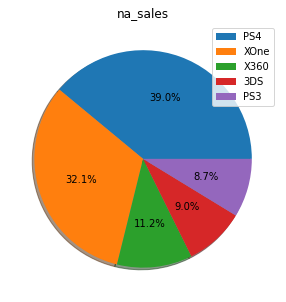

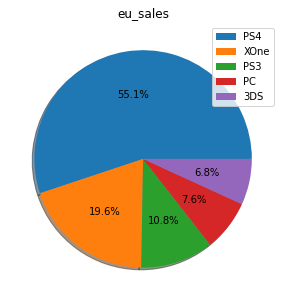

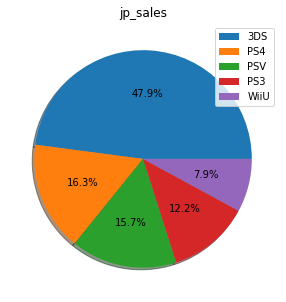

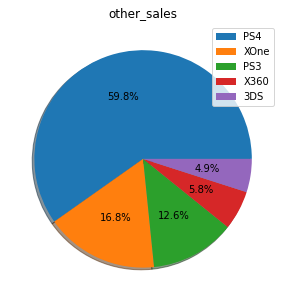

In [23]:
platform_list = sales_2014_2016['platform'].unique()
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_list:
    sales_2014_2016.query(
        'platform in @platform_list').pivot_table(
        index = 'platform', values = region, aggfunc='sum').sum(
        axis = 1).sort_values(
        ascending = False).head(
        ).plot(
    kind='pie', 
    figsize=(5,5), 
    autopct='%1.1f%%', 
    shadow=True, 
    legend=True, 
    ylabel='', 
    labeldistance=None, 
    title= region)
    plt.show()

Во всех исследуемых регионах неоспоримым лидером является `PS4` и `XOne` идет следом. Подобное распределение никак не выделяется на фоне всего того, что мы уже знаем о данных. Однако стоит отметить, что в Северной Америке `XOne` отстает лишь на 6.9%, что стоит учесть в случае продаж исключительно в этом регионе. 

### Самые популярные жанры

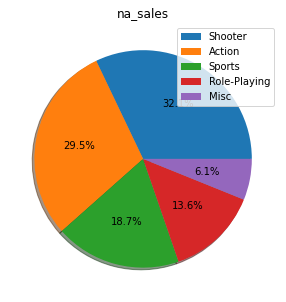

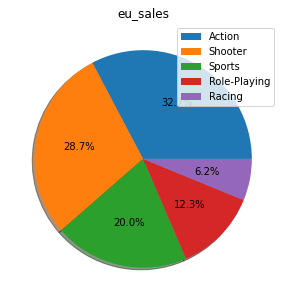

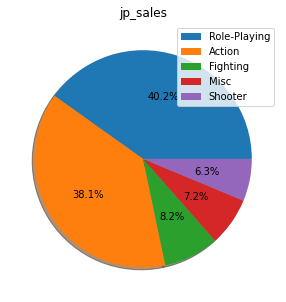

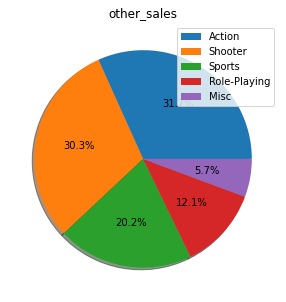

In [24]:
genre_list = sales_2014_2016['genre'].unique()
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_list:
    sales_2014_2016.query(
        'genre in @genre_list').pivot_table(
        index = 'genre', values = region, aggfunc='sum').sum(
        axis = 1).sort_values(
        ascending = False).head(
        ).plot(
    kind='pie', 
    figsize=(5,5), 
    autopct='%1.1f%%', 
    shadow=True, 
    legend=True, 
    ylabel='', 
    labeldistance=None, 
    title= region)
    plt.show()

Из графиков видно, что в основном во всех регионах, кроме Японии, жанры `Shooter` и `Action` преобладают среди пользователей. В Японии же практически лоб в лоб идут `Role-Playing` и `Action`, из чего можно сделать вывод, что жанр `Action` занимает топ 1-2 во всех регионах, тем самым является популярным и надежным, и в случае выхода исключительно на рынок Японии стоит рассмотреть возможность разработки РПГ.

### Влияние рейтинга ESRB на продажи в регионах

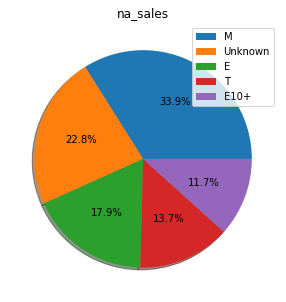

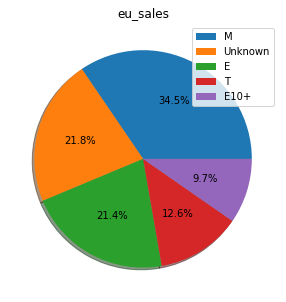

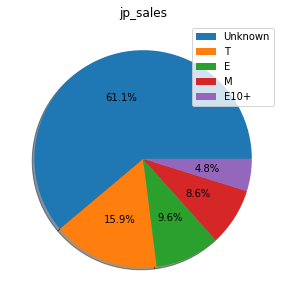

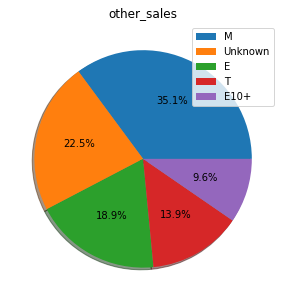

In [25]:
rating_list = sales_2014_2016['rating'].unique()
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_list:
    sales_2014_2016.query(
        'rating in @rating_list').pivot_table(
        index = 'rating', values = region, aggfunc='sum').sum(
        axis = 1).sort_values(
        ascending = False).head(
        ).plot(
    kind='pie', 
    figsize=(5,5), 
    autopct='%1.1f%%', 
    shadow=True, 
    legend=True, 
    ylabel='', 
    labeldistance=None, 
    title= region)
    plt.show()

<s>И вновь во всех регионах, кроме Японии, картина примерно одна и та же - `M` во главе, `E` на втором месте. В Японии же `T` лидирует, что опять же говорит о безопасности рейтинга `E` и внимательности к рейтингу `T` в случае выхода на Японский рынок.</s>

Включив в анализ все тайтлы без рейтинга картина довольно сильно поменялась. Теперь во всех регионах `Unknown` и `M` делят пъедестал, а в Японии аж 61% всех игр идут без рейтинга в принципе, так как они имеют возрастной рейтинг другой ассоциации. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H_0: Средние пользовательские рейтинги (`user_score`) платформы Xbox One = средние пользовательские рейтинги (`user_score`) платформы PC
H_1: Средние пользовательские рейтинги (`user_score`) платформы Xbox One ≠ средние пользовательские рейтинги (`user_score`) платформы PC
alpha = 0.05

In [26]:
no_na_sales_2014_2016 = sales_2014_2016.reset_index()
no_na_sales_2014_2016 = no_na_sales_2014_2016.dropna(subset=['user_score'])
user_score_XOne =\
no_na_sales_2014_2016[no_na_sales_2014_2016['platform']=='XOne']['user_score']
user_score_PC =\
no_na_sales_2014_2016[no_na_sales_2014_2016['platform']=='PC']['user_score']

results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [27]:
sales_2014_2016.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
3DS,7.138182
PC,6.298361
PS3,6.014286
PS4,6.828099
PSV,7.656164
Wii,6.350000
WiiU,7.087500
X360,5.771084
XOne,6.594545


### Средние пользовательские рейтинги жанров Action и Sports разные
H_0: Средние пользовательские рейтинги (`user_score`) жанра Action = средние пользовательские рейтинги (`user_score`) жанра Sports 
<br>
H_1: Средние пользовательские рейтинги (`user_score`) жанра Action ≠ средние пользовательские рейтинги (`user_score`) жанра Sports
<br>
alpha = 0.05

In [28]:
user_score_Action =\
no_na_sales_2014_2016[no_na_sales_2014_2016['genre']=='Action']['user_score']
user_score_Sports =\
no_na_sales_2014_2016[no_na_sales_2014_2016['genre']=='Sports']['user_score']

results = st.ttest_ind(user_score_Action, user_score_Sports, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [29]:
sales_2014_2016.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.760606
Adventure,7.470213
Fighting,6.983784
Misc,6.968293
Platform,6.741379
Puzzle,7.975000
Racing,6.327451
Role-Playing,7.348571
Shooter,6.549074


## Общий вывод

В ходе данного исследования был проведен:
1. Исследовательский анализ данных. Определен **актуальный период** для прогноза; выявлены **самые популярные и перспективные платформы и жанры**; проанализирована **связь продаж с оценками пользователей и критиков**.
2. Составлен портрет пользователя каждого региона. Исследование подкреплено графиками и выводами по полученным данным.
3. Проверены гипотезы.

Рекомендации для заказчика - потенциально популярным продуктом на 2017 год является игра:
1. На платформе **Xbox One** или **Playstation 4**
2. В жанре **Shooter** или **Action**
3. С рейтингом **M** или **E** ESRB.